Install & Import Library

In [ ]:
!pip install nltk Sastrawi emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 15.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import nltk
import emoji

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Load Data + Seleksi Fitur

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Mini_Project/review_aplikasi_belajar.csv")

df = df[['app', 'review', 'rating']]
df = df.dropna()

Hapus Duplikat

In [ ]:
df = df.drop_duplicates(subset='review')
df.reset_index(drop=True, inplace=True)

Case Folding

In [ ]:
def case_folding(text):
    return text.lower()

df['clean_text'] = df['review'].astype(str).apply(case_folding)

Hapus URL, Mention, Hashtag

In [ ]:
def remove_url_mention_hashtag(text):
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    return text

df['clean_text'] = df['clean_text'].apply(remove_url_mention_hashtag)

Hapus Emoji & Non-ASCII

In [ ]:
def remove_emoji_nonascii(text):
    text = emoji.replace_emoji(text, replace='')
    return text.encode('ascii', 'ignore').decode('ascii')

df['clean_text'] = df['clean_text'].apply(remove_emoji_nonascii)

Hapus Angka & Tanda Baca

In [ ]:
def remove_number_punctuation(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    return text

df['clean_text'] = df['clean_text'].apply(remove_number_punctuation)

Rapikan Spasi (Awal)

In [ ]:
def normalize_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

df['clean_text'] = df['clean_text'].apply(normalize_whitespace)

Tokenisasi (NLTK)

In [ ]:
nltk.download('punkt_tab')
df['tokens'] = df['clean_text'].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Kamus Slang & Typo

In [ ]:
slang_dict = {
    # negasi
    'gk': 'tidak',
    'ga': 'tidak',
    'gak': 'tidak',
    'nggak': 'tidak',
    'ngga': 'tidak',
    'ngak': 'tidak',
    'tdk': 'tidak',

    # intensitas & penekanan
    'bgt': 'banget',
    'bngt': 'banget',
    'bangett': 'banget',

    # kata umum
    'tp': 'tapi',
    'jd': 'jadi',
    'jg': 'juga',
    'sm': 'sama',
    'dr': 'dari',
    'dl': 'dulu',
    'lg': 'lagi',
    'kl': 'kalau',
    'klo': 'kalau',
    'klau': 'kalau',
    'kalo': 'kalau',
    'pdhl': 'padahal',

    # waktu
    'udh': 'sudah',
    'udah': 'sudah',
    'msh': 'masih',
    'skrng': 'sekarang',

    # kata kerja
    'nyoba': 'mencoba',
    'gabisa': 'tidak bisa',
    'bisaaa': 'bisa',
    'pake': 'pakai',
    'kasi': 'kasih',
    'liat': 'lihat',
    'ngerti': 'mengerti',

    # kata benda & sifat
    'bgs': 'bagus',
    'bgus': 'bagus',
    'baguss': 'bagus',
    'bnyk': 'banyak',
    'dlm': 'dalam',
    'dpt': 'dapat',
    'bkn': 'bukan',

    # kata sambung
    'trs': 'terus',
    'trus': 'terus',

    # alasan
    'krn': 'karena',
    'karna': 'karena',

    # aplikasi
    'apk': 'aplikasi',

    # bantu & maksud
    'bntu': 'bantu',
    'mksd': 'maksud',
    'mksdnya': 'maksudnya',

    # benar
    'bner': 'benar',
    'beneran': 'benar',
    'sbnrnya': 'sebenarnya',

    # terima kasih
    'trmksh': 'terima kasih',
    'trims': 'terima kasih',
    'makasih': 'terima kasih',
    'makasi': 'terima kasih',
    'terimakasih': 'terima kasih',

    # persetujuan
    'ok': 'baik',
    'oke': 'baik',
    'okey': 'baik',

    # partikel
    'aja': 'saja'
}

Stopword (Sastrawi + NLTK + Tambahan)

In [ ]:
stopword_sastrawi = set(StopWordRemoverFactory().get_stop_words())
stopword_nltk = set(stopwords.words('indonesian'))

stopword_tambahan = {
    'aplikasi','banget','nih','dong','yaa','aja','lah','kok','ya','app','yg','nya','nih','nihh','kok','lah','dong','ku','sy','loh','deh','lahh','yah','yahh','mak','oke','okey','okeyy','okayy','woow','wow','hehe','haha'
}

all_stopwords = stopword_sastrawi.union(stopword_nltk).union(stopword_tambahan)

In [ ]:
noise_words = {
    'ya','yah','deh','dong','kok','sih','nih','tuh','aja',
    'hehe','hehehe','hahaha','wkwk','wkwkwk',
    'gini','gitu','kayak','kaya',
    'udah','udah','lagi','banget'
}

all_stopwords = all_stopwords.union(noise_words)

In [ ]:
kata_pendek_edukasi = {
    'sd', 'smp', 'sma', 'smk',
    'ipa', 'ips', 'ui', 'itb','ugm',
    'mtk', 'pai'
}

# Words to preserve from aggressive cleaning, especially for brand names or specific terms.
preserved_words = {
    'ruangguru', 'pahamify', 'quipper', 'manfaat'
}

Fungsi REFINEMENT TOKEN (INTI)

In [ ]:
def refine_tokens(tokens):
    refined = []
    prev_word = ''

    for word in tokens:
        if not word.isalpha():
            continue

        # Store the original word to check against preserved_words before modification
        original_word_lower = word.lower()

        # Only apply repeated character reduction if the word is not in the preserved list
        if original_word_lower not in preserved_words:
            word = re.sub(r'(.)\1+', r'\1', word)

        # slang
        word = slang_dict.get(word, word)

        # hapus imbuhan informal
        word = re.sub(r'^(nge)', '', word)
        word = re.sub(r'(in|nya)$', '', word)

        # stopword
        if word in all_stopwords:
            continue

        # hapus kata pendek kecuali edukasi
        if len(word) <= 3 and word not in kata_pendek_edukasi:
            continue

        # hapus duplikasi berurutan
        if word == prev_word:
            continue

        refined.append(word)
        prev_word = word

    return refined

Terapkan Refinement

In [ ]:
df['tokens_clean'] = df['tokens'].apply(refine_tokens)

Stemming (Sastrawi)

In [ ]:
stemmer = StemmerFactory().create_stemmer()

def stemming_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

df['tokens_clean'] = df['tokens_clean'].apply(stemming_tokens)

In [ ]:
import re

def aggressive_post_stemming_cleanup(tokens, kata_pendek_edukasi):
    cleaned_tokens = []

    for original_word in tokens:
        if not isinstance(original_word, str):
            continue

        word = original_word.lower()

        # Aggressive prefix removal (urut dari terpanjang)
        word = re.sub(r'^(meng|meny|mem|men|peng|peny|pem|pen|ber|ter|ke|di)', '', word)

        # Aggressive suffix / particle removal
        # Menambahkan 'ku' ke daftar sufiks yang akan dihapus
        word = re.sub(r'(kan|nya|lah|kah|pun|an|in|ku)$', '', word)

        # Keep only if it's longer than 3 characters OR it's an educational short word,
        # and ensure it's still alphabetic after removal.
        if (len(word) > 3 or word in kata_pendek_edukasi) and word.isalpha():
            cleaned_tokens.append(word)

    return cleaned_tokens

In [ ]:
df['tokens_clean'] = df['tokens_clean'].apply(
    lambda tokens: [
        w for w in tokens
        if isinstance(w, str)
        and w.isalpha()
        and (len(w) > 3 or w in kata_pendek_edukasi)
    ] if isinstance(tokens, list) else []
)

In [ ]:
df['tokens_clean'] = df['tokens_clean'].apply(lambda tokens: aggressive_post_stemming_cleanup(tokens, kata_pendek_edukasi))

Gabungkan Token → Teks Bersih Final

In [ ]:
df['final_text'] = df['tokens_clean'].apply(lambda x: ' '.join(x))

In [ ]:
from collections import Counter

all_words = [w for doc in df['tokens_clean'] for w in doc]
freq = Counter(all_words)

MIN_FREQ = 5

df['tokens_clean'] = df['tokens_clean'].apply(
    lambda x: [w for w in x if freq[w] >= MIN_FREQ]
)

Cek Hasil

In [ ]:
print("Total data after preprocessing:", len(df))

Total data after preprocessing: 5294


In [ ]:
for app_name in df['app'].unique():
    print(f"\n===== Contoh data {app_name} setelah Preprocessing =====")
    display(df[df['app'] == app_name][['review', 'final_text']].head())


===== Contoh data Ruangguru setelah Preprocessing =====


,review,final_text
0,kenapa ya selalu update setiap mau masuk ke ha...,update masuk halam mana masuk update dril upda...
1,bagussd,bagusd
2,"banyak bug!!!,kalau buka aplikasi sering terke...",buka luar
3,wahhh sangat 🅑🅐🅖🅤🅢,
4,good,



===== Contoh data Pahamify setelah Preprocessing =====


,review,final_text
1743,"Aga kecewa si, pdhl udah berlangganan. Mau pak...",cewa langan pakai fitur pegasus load jaring ba...
1744,"Pembayaran dialihkan ke website, tidak didalam...",bayar alih website dalam standar sistem bayar ...
1745,"server lelet, suka ngebug, dn paket tdk bisa d...",server lelet suka paket refund
1746,"Dari segi kualitas dah lumayan, tapi masih per...",segi kualitas lumay mbang sistem loading bank ...
1747,Sejauh ini berlangganan cukup baguss tapi masa...,langan bagus kadang signal video download kada...



===== Contoh data Quipper setelah Preprocessing =====


,review,final_text
3513,"gak tau kenapa, tapi search buat materi di hp ...",search materi akses coba filter coba sinyal nceng
3514,"sistem ujian ga aman, banyak orang melakukan k...",sistem orang curang rugi seko sampah
3515,berguna😆,guna
3516,"gak jelas, gak seru, sok asik nge gantiin kertas",seru asik gant rtas
3517,tiba tiba akun saya hilang,akun hilang


In [ ]:
df['final_text'] = df['final_text'].str.replace('ruang guru', 'ruangguru', regex=False)
print("Kata 'ruang guru' telah digabungkan menjadi 'ruangguru' di kolom final_text.")
display(df.head())

Kata 'ruang guru' telah digabungkan menjadi 'ruangguru' di kolom final_text.


,app,review,rating,clean_text,tokens,tokens_clean,final_text
0,Ruangguru,kenapa ya selalu update setiap mau masuk ke ha...,1,kenapa ya selalu update setiap mau masuk ke ha...,"[kenapa, ya, selalu, update, setiap, mau, masu...","[update, masuk, halam, mana, masuk, update, dr...",update masuk halam mana masuk update dril upda...
1,Ruangguru,bagussd,5,bagussd,[bagussd],[],bagusd
2,Ruangguru,"banyak bug!!!,kalau buka aplikasi sering terke...",1,banyak bug kalau buka aplikasi sering terkelua...,"[banyak, bug, kalau, buka, aplikasi, sering, t...","[buka, luar]",buka luar
3,Ruangguru,wahhh sangat 🅑🅐🅖🅤🅢,4,wahhh sangat,"[wahhh, sangat]",[],
4,Ruangguru,good,5,good,[good],[],


Simpan Hasil

In [ ]:
df.to_csv("/content/drive/MyDrive/Mini_Project/review_aplikasi_belajar_preprocessed_FINAL.csv", index=False)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Mini_Project/review_aplikasi_belajar_preprocessed_FINAL.csv")

df = df[['app', 'review', 'rating', 'final_text']]
df = df.dropna()
df

,app,review,rating,final_text
0,Ruangguru,kenapa ya selalu update setiap mau masuk ke ha...,1,update masuk halam mana masuk update dril upda...
1,Ruangguru,bagussd,5,bagusd
2,Ruangguru,"banyak bug!!!,kalau buka aplikasi sering terke...",1,buka luar
5,Ruangguru,ngebantu,5,bantu
6,Ruangguru,jelek,1,jelek
...,...,...,...,...
5289,Quipper,Ribet masuknya,2,ribet masuk
5290,Quipper,Di soal b.indo terdapat jawaban yang sama pers...,4,indo persis bingung baik kasih
5291,Quipper,quipper sangat membantu disaat masa kbm daring...,5,quipper bantu daring
5292,Quipper,Kak tolong diperbaiki fitur tanya tutor soalny...,4,baik fitur tutor kirim foto engak


### Kata Paling Sering Muncul di Semua Aplikasi


In [ ]:
print("Top 20 kata yang paling sering muncul di semua aplikasi:")
for word, freq_val in freq.most_common(20):
    print(f"- {word}: {freq_val}")

Top 20 kata yang paling sering muncul di semua aplikasi:
- ajar: 1653
- bagus: 1310
- bantu: 725
- materi: 567
- video: 471
- mudah: 459
- paham: 443
- quipper: 443
- guru: 373
- suka: 366
- pahamify: 314
- buka: 313
- baik: 310
- ruang: 285
- kasih: 269
- update: 267
- ruangguru: 263
- pakai: 257
- fitur: 253
- langan: 246


### Kata Paling Sering Muncul per Aplikasi


In [ ]:
from nltk.probability import FreqDist

for app_name in df['app'].unique():
    app_words = ' '.join(df[df['app'] == app_name]['final_text'].astype(str)).split()
    app_word_freq = FreqDist(app_words)
    print(f"\nTop 20 kata yang paling sering muncul di {app_name}:")
    for word, freq in app_word_freq.most_common(20):
        print(f"- {word}: {freq}")


Top 20 kata yang paling sering muncul di Ruangguru:
- ajar: 738
- bagus: 535
- ruangguru: 502
- bantu: 242
- paham: 171
- mudah: 150
- suka: 136
- seru: 133
- materi: 122
- video: 117
- buka: 88
- bayar: 88
- anak: 83
- langan: 82
- masuk: 81
- erti: 75
- pakai: 75
- fitur: 71
- nilai: 63
- baik: 59

Top 20 kata yang paling sering muncul di Pahamify:
- ajar: 426
- bagus: 402
- pahamify: 313
- video: 209
- bantu: 204
- materi: 173
- baik: 150
- suka: 148
- buka: 134
- utbk: 131
- fitur: 127
- mudah: 121
- kasih: 117
- paham: 116
- update: 99
- download: 95
- langan: 87
- pakai: 82
- gratis: 82
- eror: 72

Top 20 kata yang paling sering muncul di Quipper:
- ajar: 489
- quipper: 442
- bagus: 373
- bantu: 279
- materi: 272
- mudah: 188
- paham: 156
- video: 145
- update: 128
- tugas: 113
- baik: 101
- pakai: 100
- kasih: 94
- masuk: 92
- buka: 91
- suka: 82
- lengkap: 77
- langan: 77
- tutor: 76
- erti: 73


wordcloud

In [ ]:
!pip install wordcloud matplotlib

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

print("Libraries imported successfully.")

Libraries imported successfully.


wordcloud seluruh aplikasi

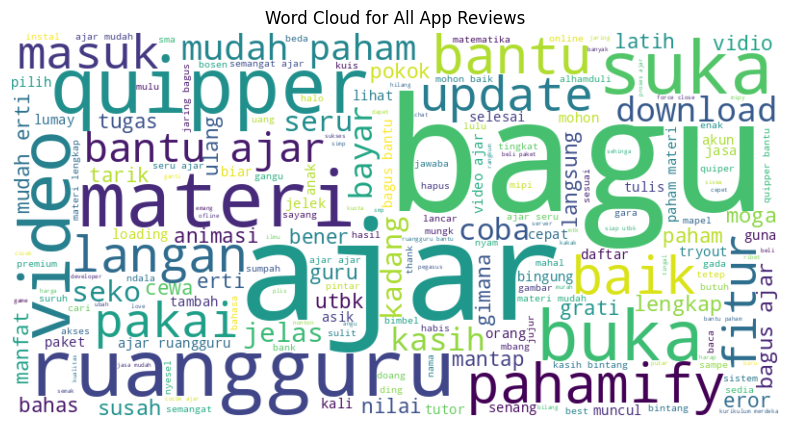

Word cloud for all app reviews generated and displayed.


In [ ]:
all_final_text = ' '.join(df['final_text'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_final_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All App Reviews')
plt.show()

print("Word cloud for all app reviews generated and displayed.")

wordcloud per-aplikasi

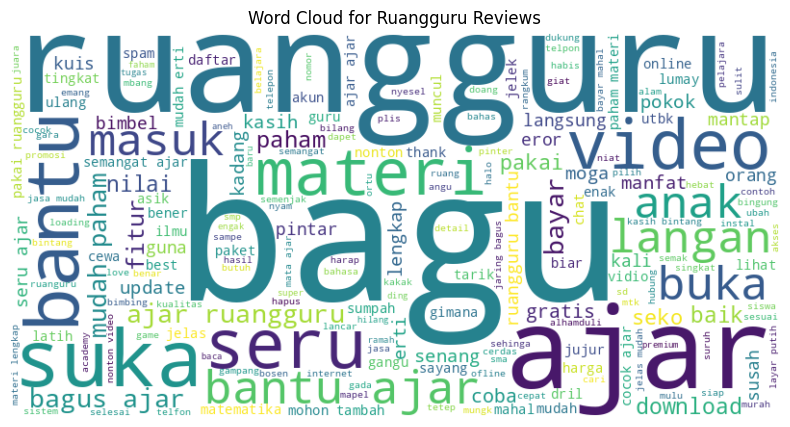

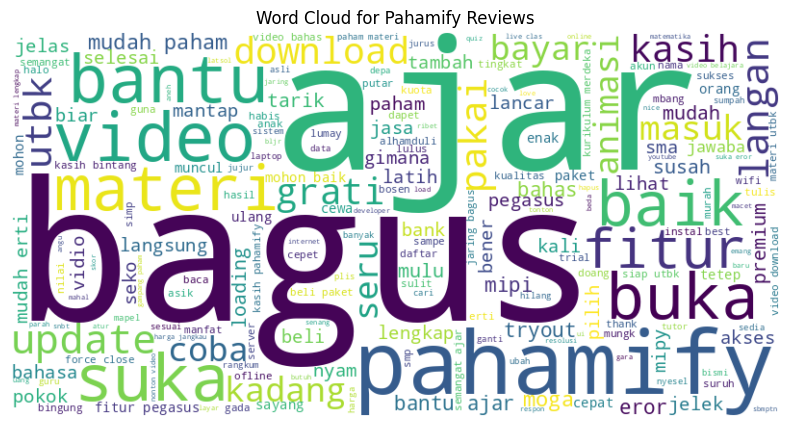

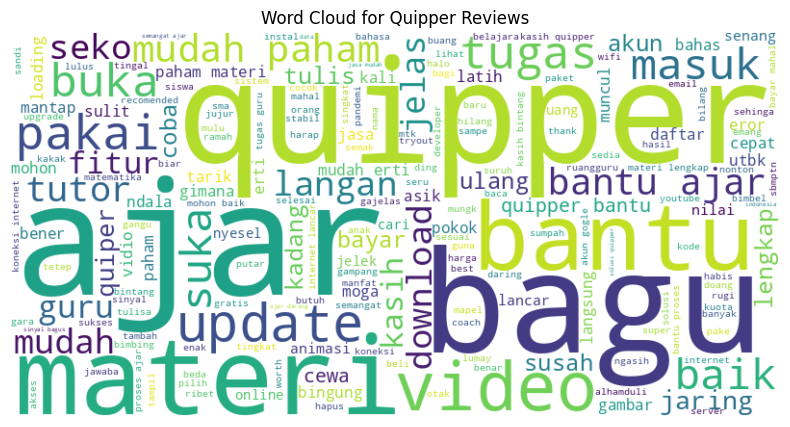

Individual word clouds for each app generated and displayed.


In [ ]:
unique_apps = df['app'].unique()

for app_name in unique_apps:
    app_text = ' '.join(df[df['app'] == app_name]['final_text'].astype(str))

    wordcloud_app = WordCloud(width=800, height=400, background_color='white').generate(app_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_app, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {app_name} Reviews')
    plt.show()

print("Individual word clouds for each app generated and displayed.")

## Generate N-grams

### Subtask:
Generate 1-gram (unigram), 2-gram (bigram), 3-gram (trigram), and 4-gram tokens from the 'final_text' column of the preprocessed DataFrame.


In [ ]:
from nltk.probability import FreqDist
from nltk.util import ngrams

# Tokenize the combined text
all_words_tokenized = word_tokenize(all_final_text)

# Generate unigrams and their frequencies
unigram_freq = FreqDist(all_words_tokenized)

# Generate bigrams and their frequencies
bigrams = list(ngrams(all_words_tokenized, 2))
bigram_freq = FreqDist(bigrams)

# Generate trigrams and their frequencies
trigrams = list(ngrams(all_words_tokenized, 3))
trigram_freq = FreqDist(trigrams)

# Generate quadgrams and their frequencies
quadgrams = list(ngrams(all_words_tokenized, 4))
quadgram_freq = FreqDist(quadgrams)

print("N-grams and their frequencies generated successfully.")

N-grams and their frequencies generated successfully.


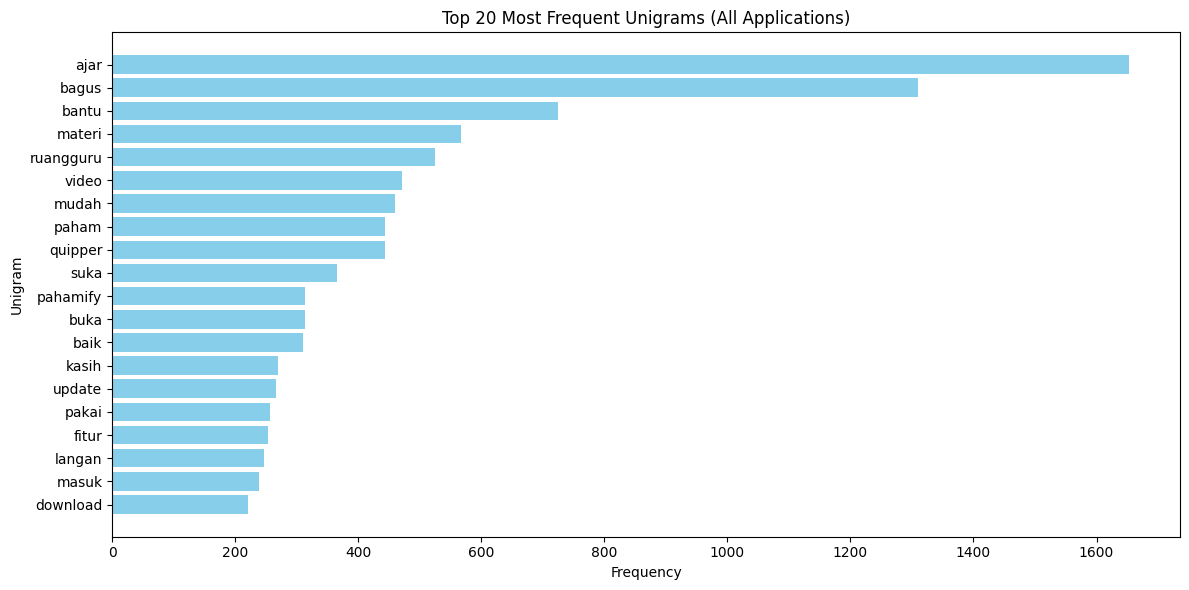

Top 20 unigrams (All Applications) displayed successfully with horizontal bar chart.


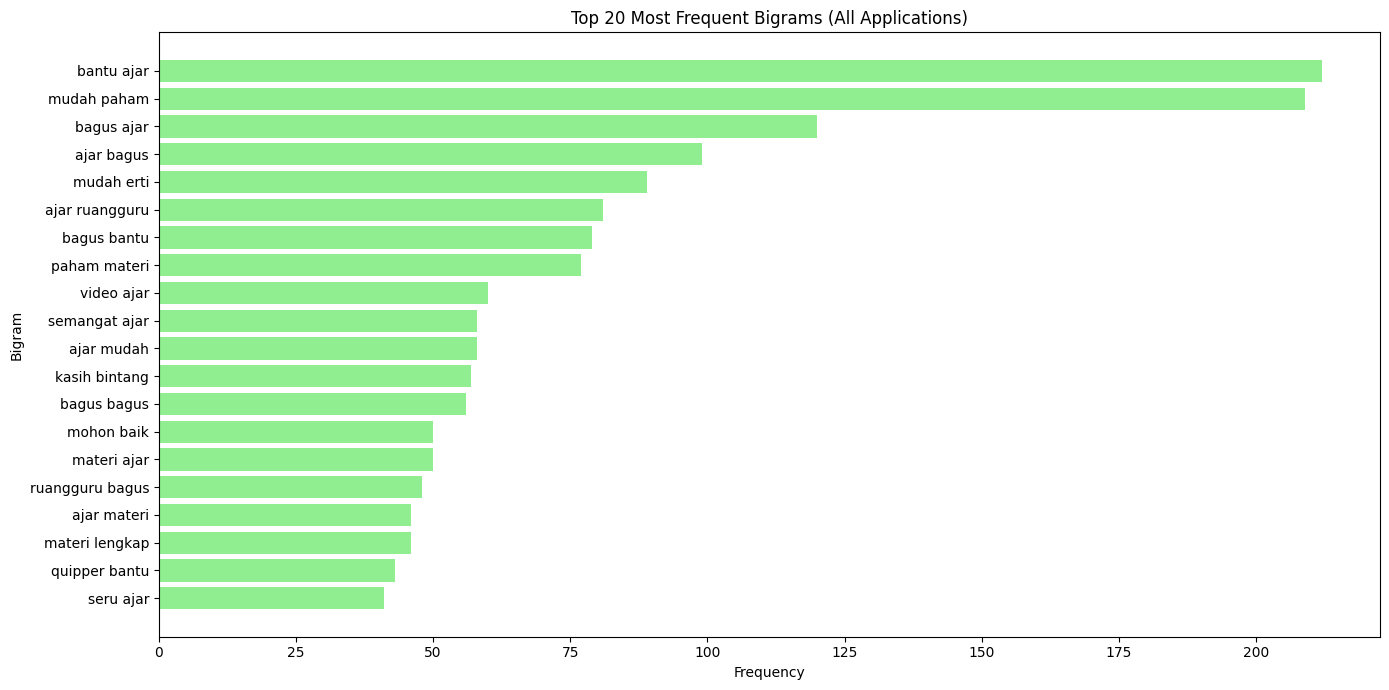

Top 20 bigrams (All Applications) displayed successfully with horizontal bar chart.


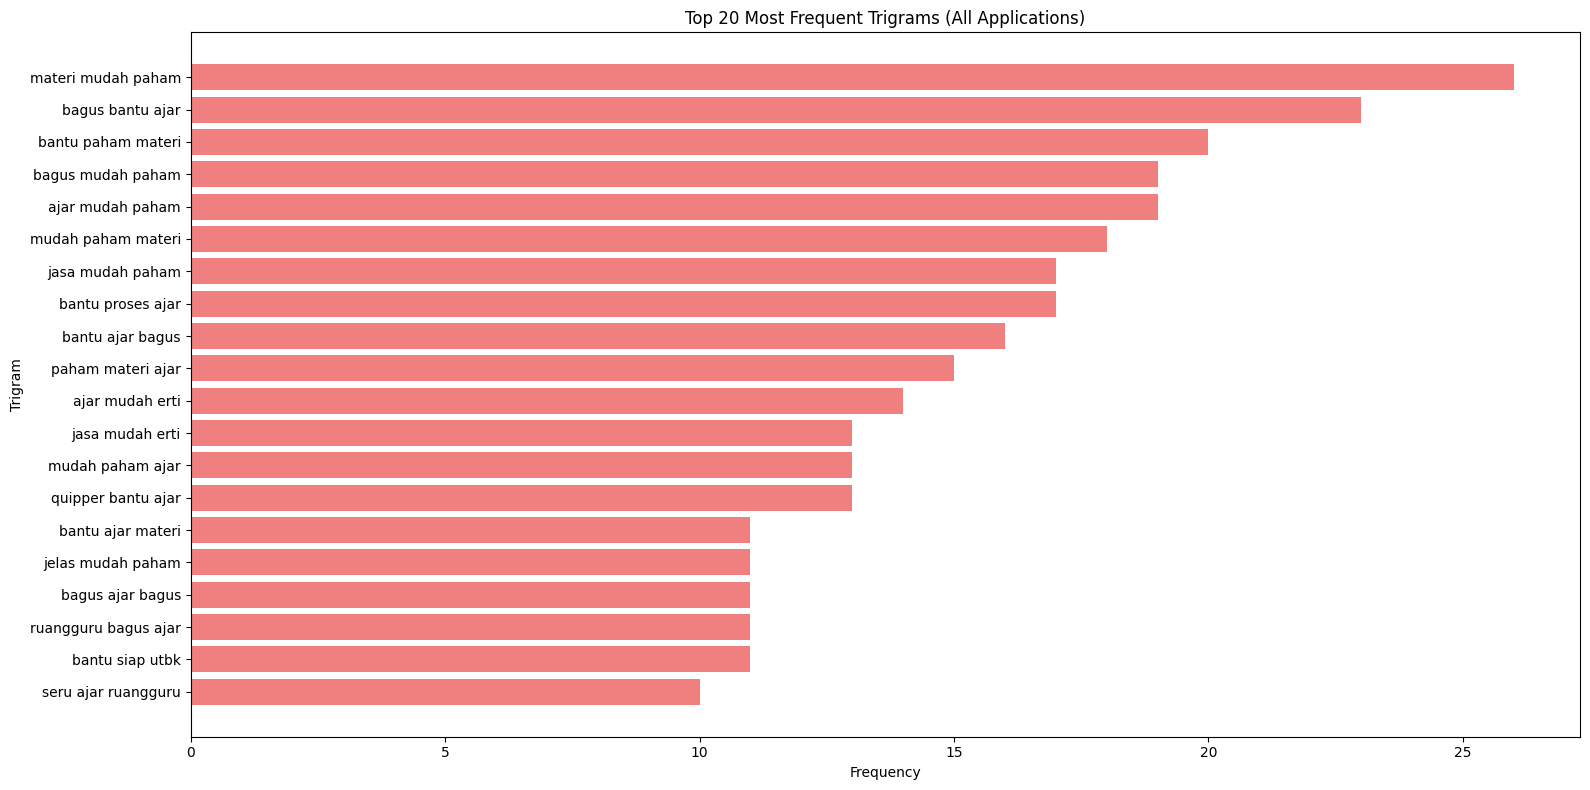

Top 20 trigrams (All Applications) displayed successfully with horizontal bar chart.


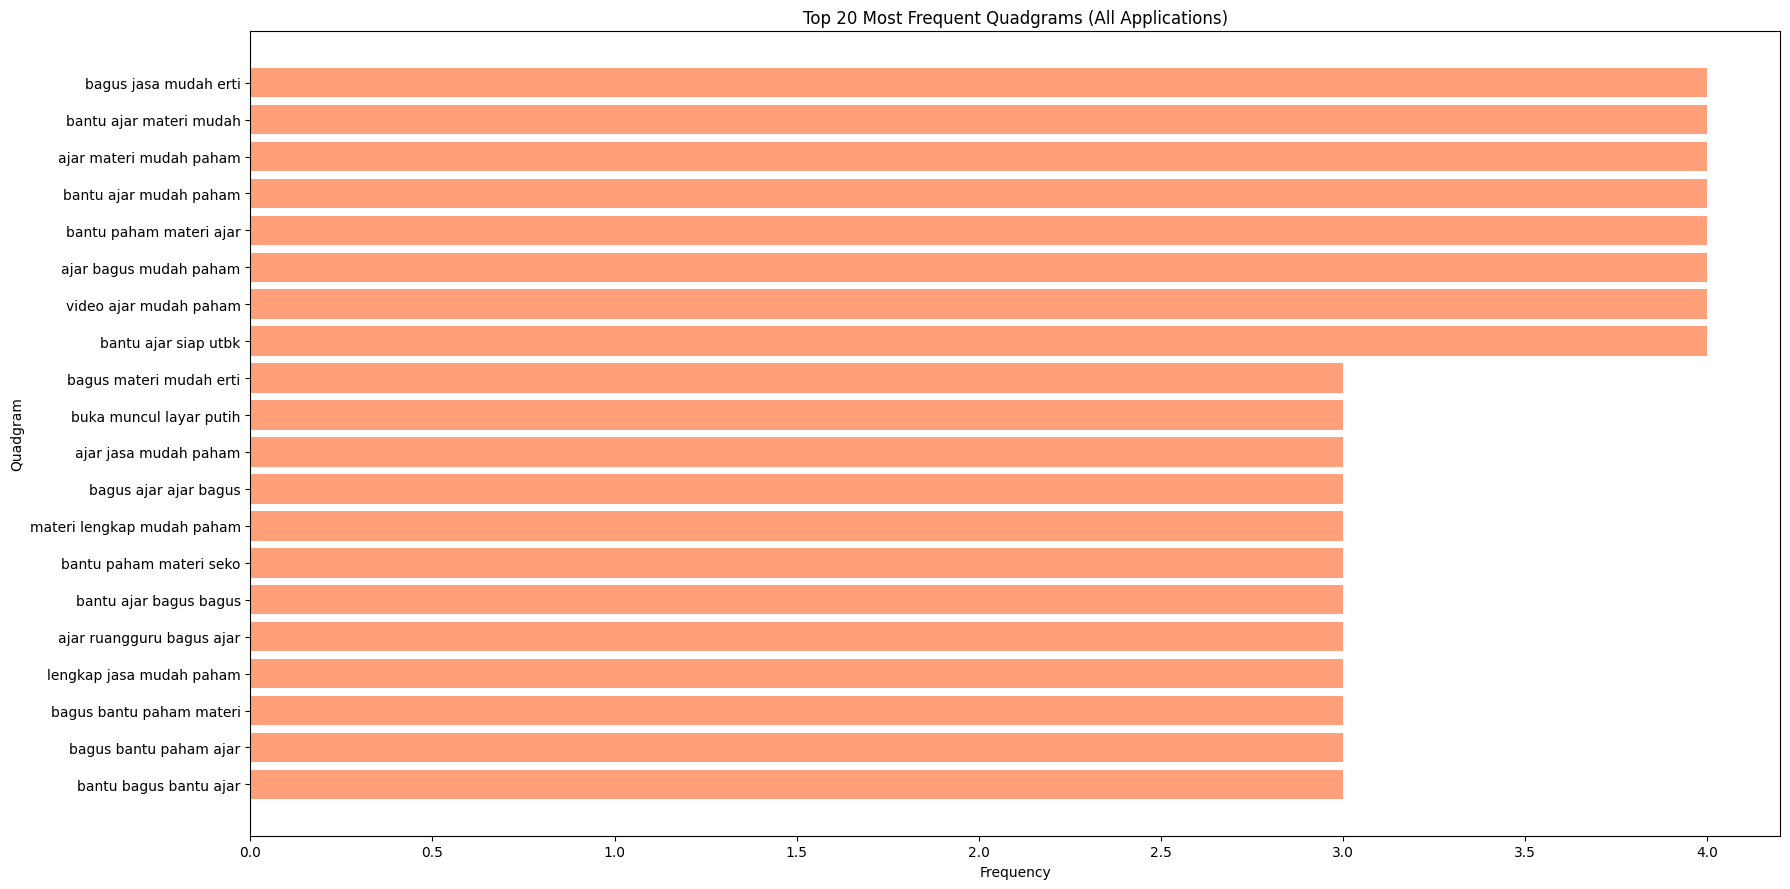

Top 20 quadgrams (All Applications) displayed successfully with horizontal bar chart.


In [ ]:
import matplotlib.pyplot as plt

# 1. Unigrams
top_20_unigrams = unigram_freq.most_common(20)
words, counts = zip(*top_20_unigrams)

# Reverse for horizontal bar chart to have highest at top
words = words[::-1]
counts = counts[::-1]

plt.figure(figsize=(12, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.title('Top 20 Most Frequent Unigrams (All Applications)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print("Top 20 unigrams (All Applications) displayed successfully with horizontal bar chart.")

# 2. Bigrams
top_20_bigrams = bigram_freq.most_common(20)
bigram_phrases = [' '.join(bigram) for bigram, count in top_20_bigrams]
counts = [count for bigram, count in top_20_bigrams]

# Reverse for horizontal bar chart to have highest at top
bigram_phrases = bigram_phrases[::-1]
counts = counts[::-1]

plt.figure(figsize=(14, 7))
plt.barh(bigram_phrases, counts, color='lightgreen')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Top 20 Most Frequent Bigrams (All Applications)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print("Top 20 bigrams (All Applications) displayed successfully with horizontal bar chart.")

# 3. Trigrams
top_20_trigrams = trigram_freq.most_common(20)
trigram_phrases = [' '.join(trigram) for trigram, count in top_20_trigrams]
counts = [count for trigram, count in top_20_trigrams]

# Reverse for horizontal bar chart to have highest at top
trigram_phrases = trigram_phrases[::-1]
counts = counts[::-1]

plt.figure(figsize=(16, 8))
plt.barh(trigram_phrases, counts, color='lightcoral')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.title('Top 20 Most Frequent Trigrams (All Applications)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print("Top 20 trigrams (All Applications) displayed successfully with horizontal bar chart.")

# 4. Quadgrams
top_20_quadgrams = quadgram_freq.most_common(20)
quadgram_phrases = [' '.join(quadgram) for quadgram, count in top_20_quadgrams]
counts = [count for quadgram, count in top_20_quadgrams]

# Reverse for horizontal bar chart to have highest at top
quadgram_phrases = quadgram_phrases[::-1]
counts = counts[::-1]

plt.figure(figsize=(18, 9))
plt.barh(quadgram_phrases, counts, color='lightsalmon')
plt.xlabel('Frequency')
plt.ylabel('Quadgram')
plt.title('Top 20 Most Frequent Quadgrams (All Applications)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print("Top 20 quadgrams (All Applications) displayed successfully with horizontal bar chart.")

In [ ]:
from nltk.probability import FreqDist
from nltk.util import ngrams

# Dictionary to store N-gram frequencies per application
app_ngram_freqs = {}

for app_name in df['app'].unique():
    # Filter DataFrame for the current application
    app_df = df[df['app'] == app_name]

    # Combine all final_text for the current application into a single string
    app_final_text = ' '.join(app_df['final_text'].astype(str))

    # Tokenize the combined text for the current application
    app_words_tokenized = word_tokenize(app_final_text)

    # Generate unigrams and their frequencies
    app_unigram_freq = FreqDist(app_words_tokenized)

    # Generate bigrams and their frequencies
    app_bigrams = list(ngrams(app_words_tokenized, 2))
    app_bigram_freq = FreqDist(app_bigrams)

    # Generate trigrams and their frequencies
    app_trigrams = list(ngrams(app_words_tokenized, 3))
    app_trigram_freq = FreqDist(app_trigrams)

    # Generate quadgrams and their frequencies
    app_quadgrams = list(ngrams(app_words_tokenized, 4))
    app_quadgram_freq = FreqDist(app_quadgrams)

    # Store frequencies in the dictionary
    app_ngram_freqs[app_name] = {
        'unigrams': app_unigram_freq,
        'bigrams': app_bigram_freq,
        'trigrams': app_trigram_freq,
        'quadgrams': app_quadgram_freq
    }

print("N-grams and their frequencies generated successfully for each application.")

N-grams and their frequencies generated successfully for each application.



===== Visualizing N-grams for Ruangguru =====


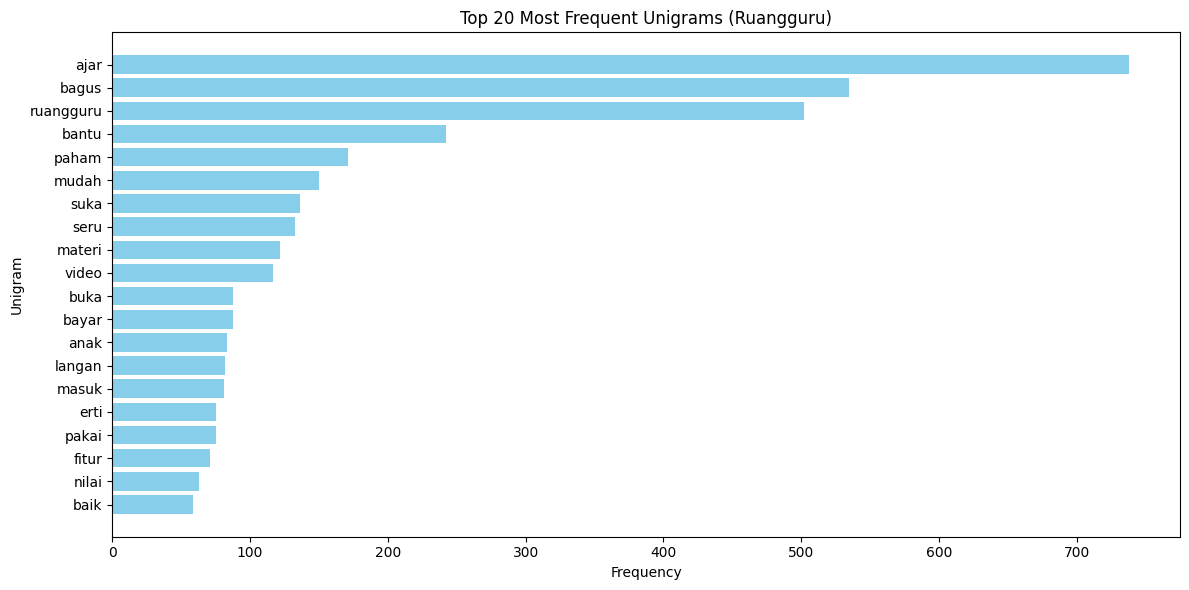

Top 20 unigrams for Ruangguru displayed successfully.


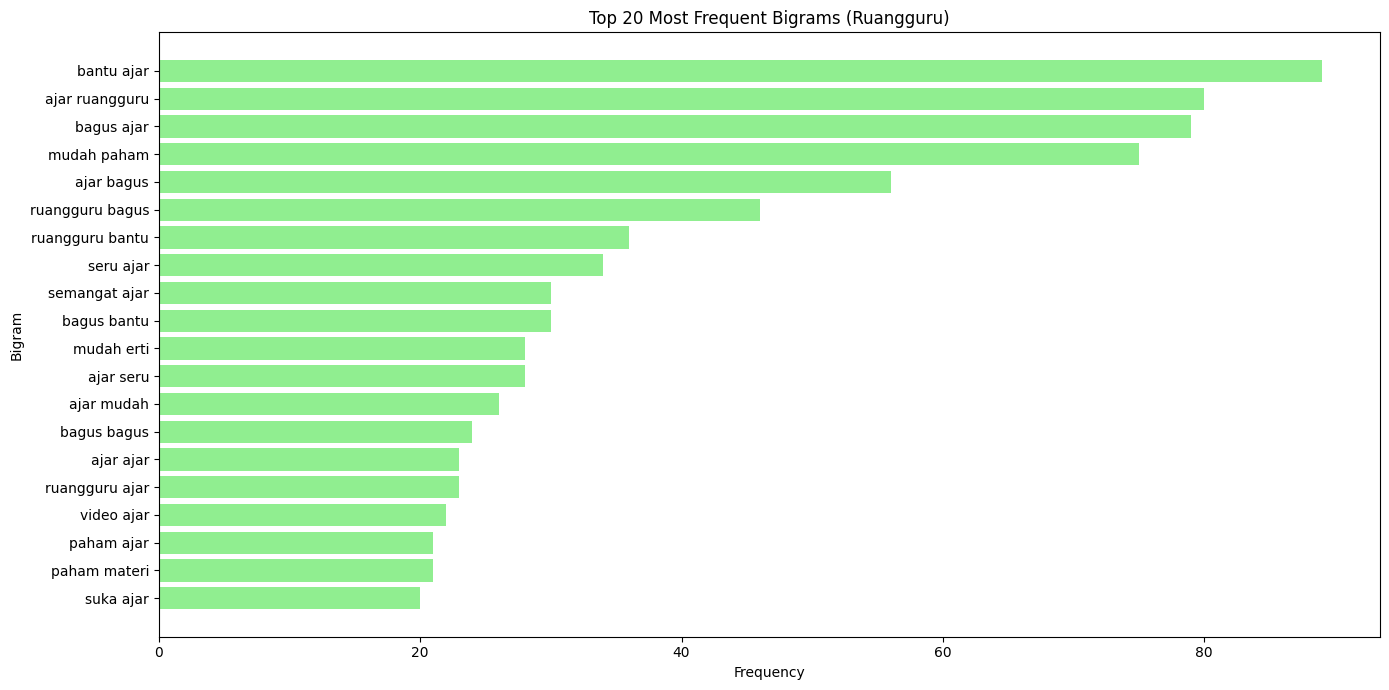

Top 20 bigrams for Ruangguru displayed successfully.


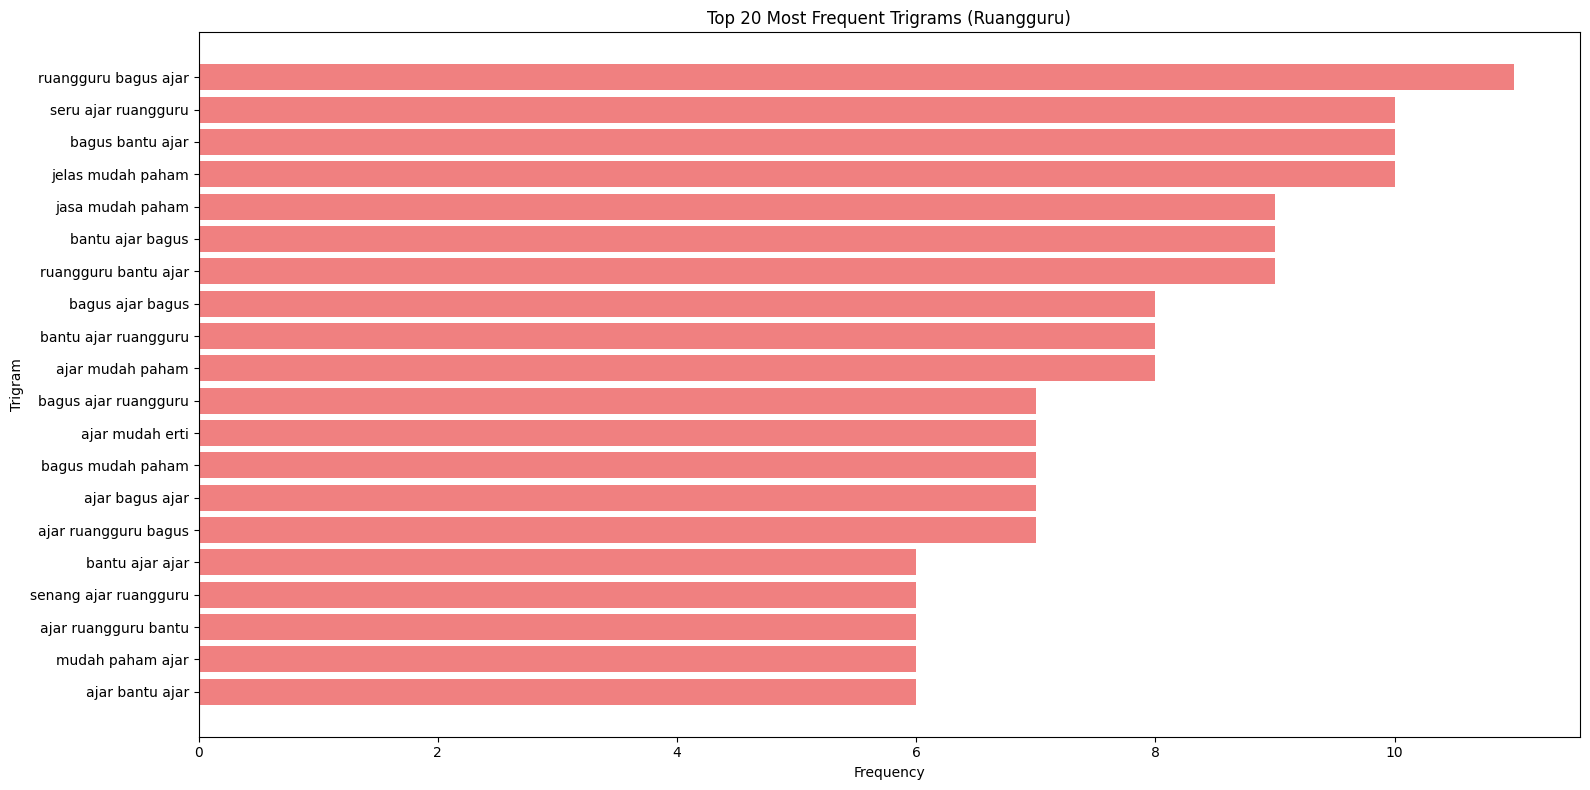

Top 20 trigrams for Ruangguru displayed successfully.


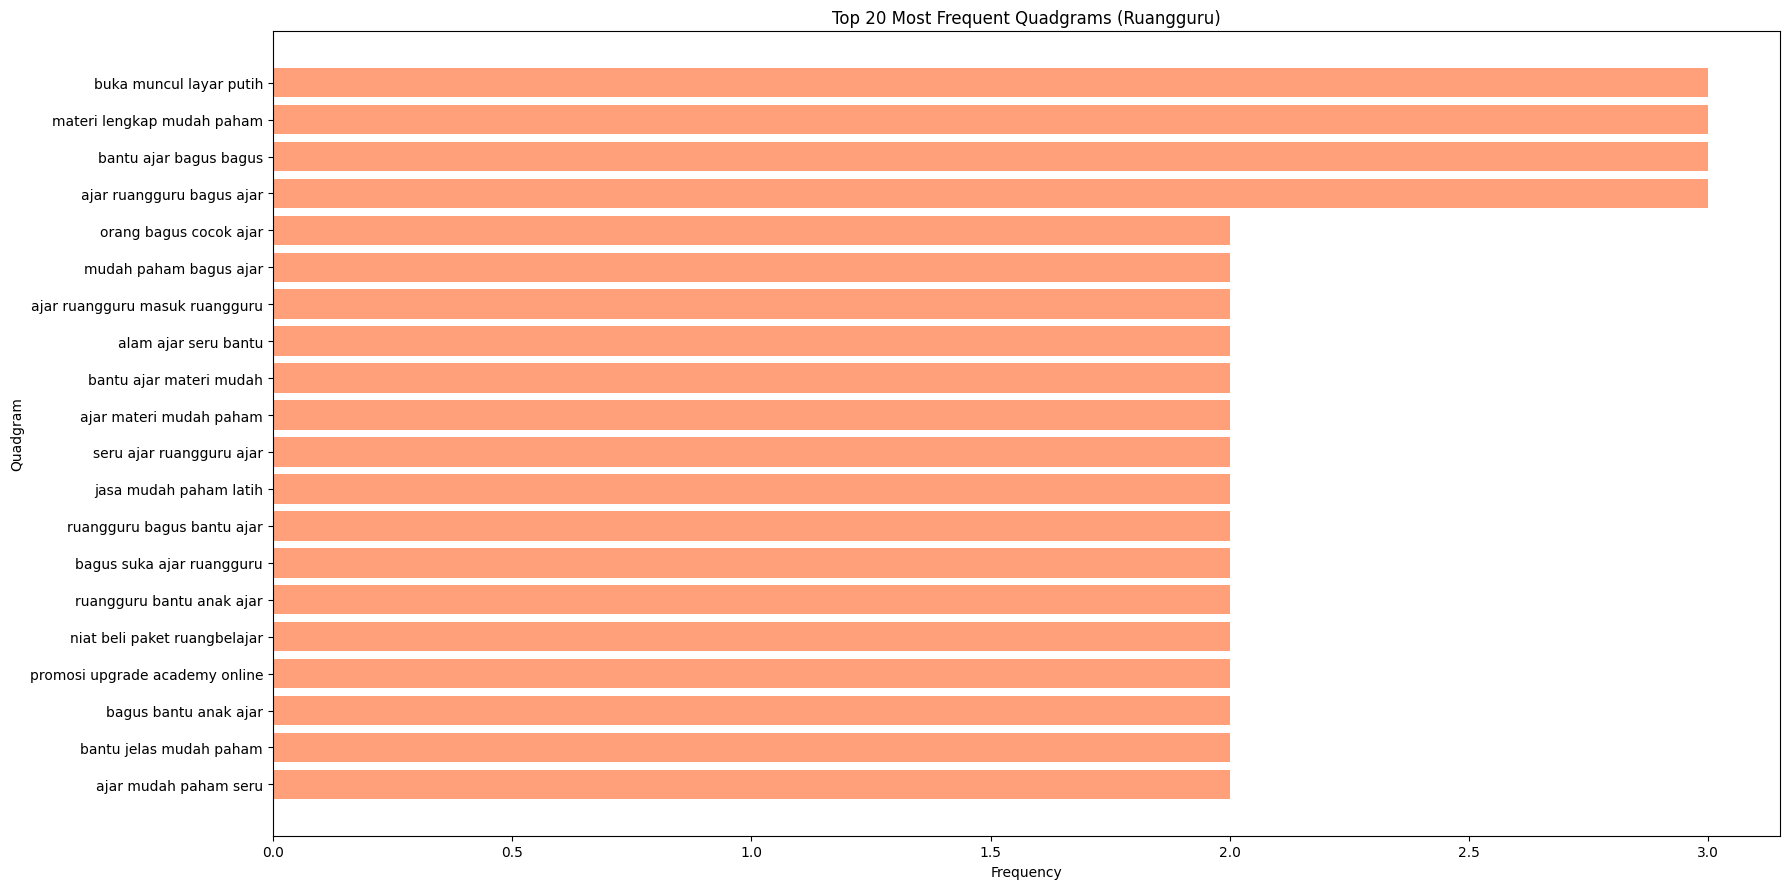

Top 20 quadgrams for Ruangguru displayed successfully.

===== Visualizing N-grams for Pahamify =====


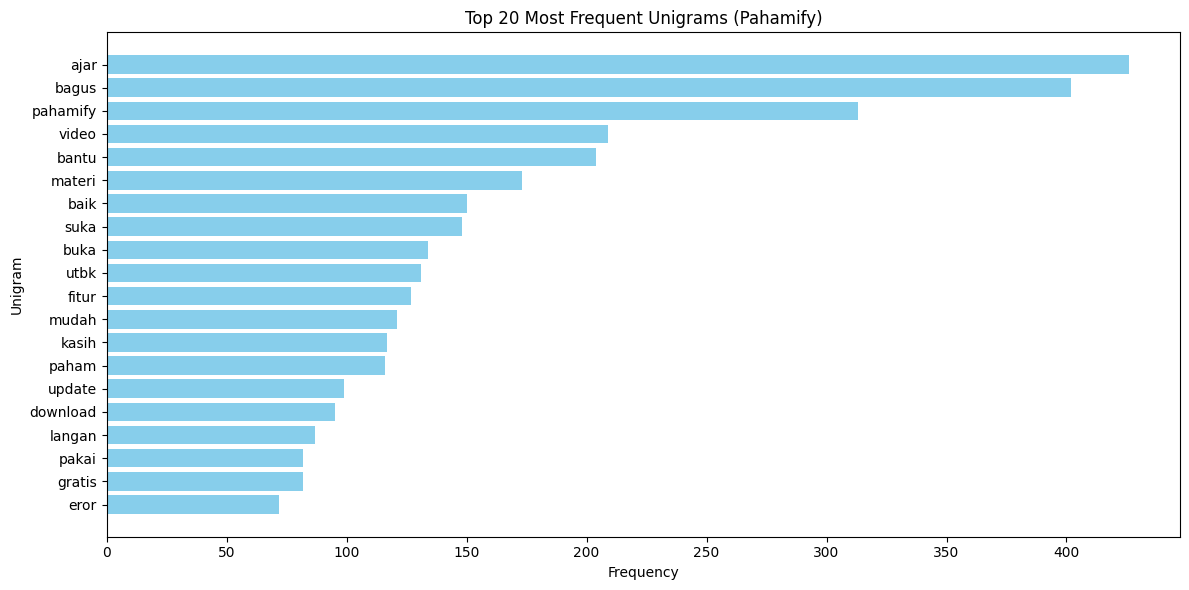

Top 20 unigrams for Pahamify displayed successfully.


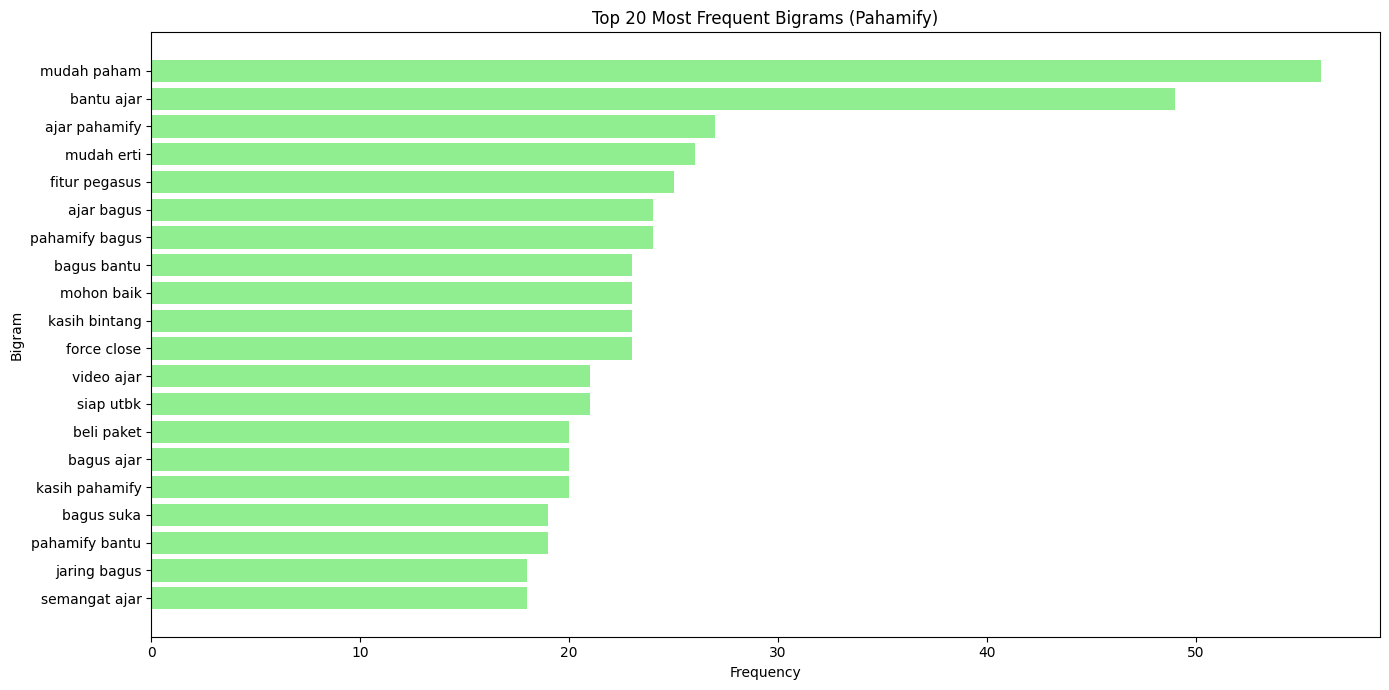

Top 20 bigrams for Pahamify displayed successfully.


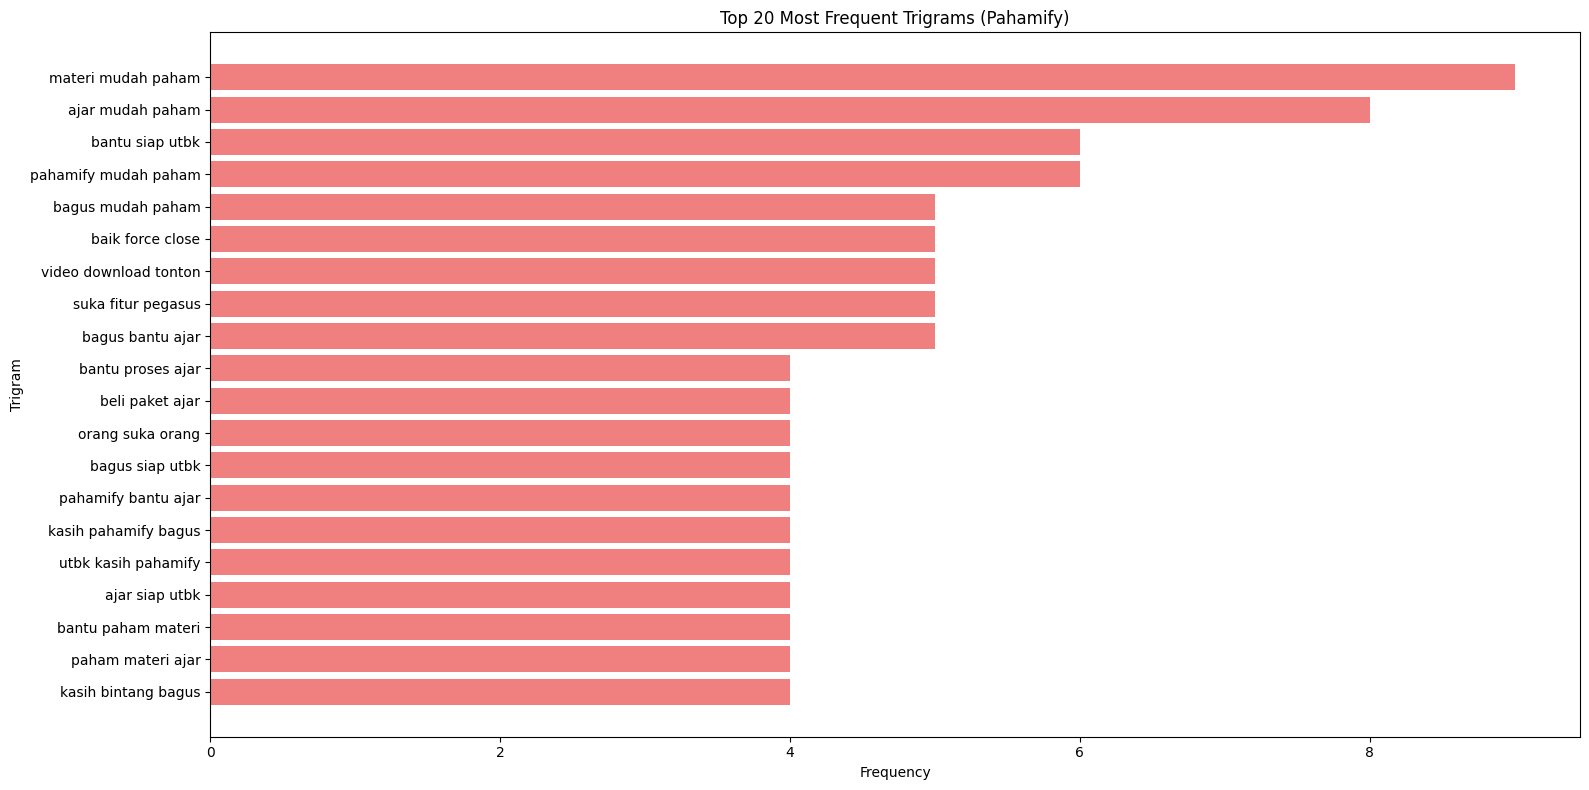

Top 20 trigrams for Pahamify displayed successfully.


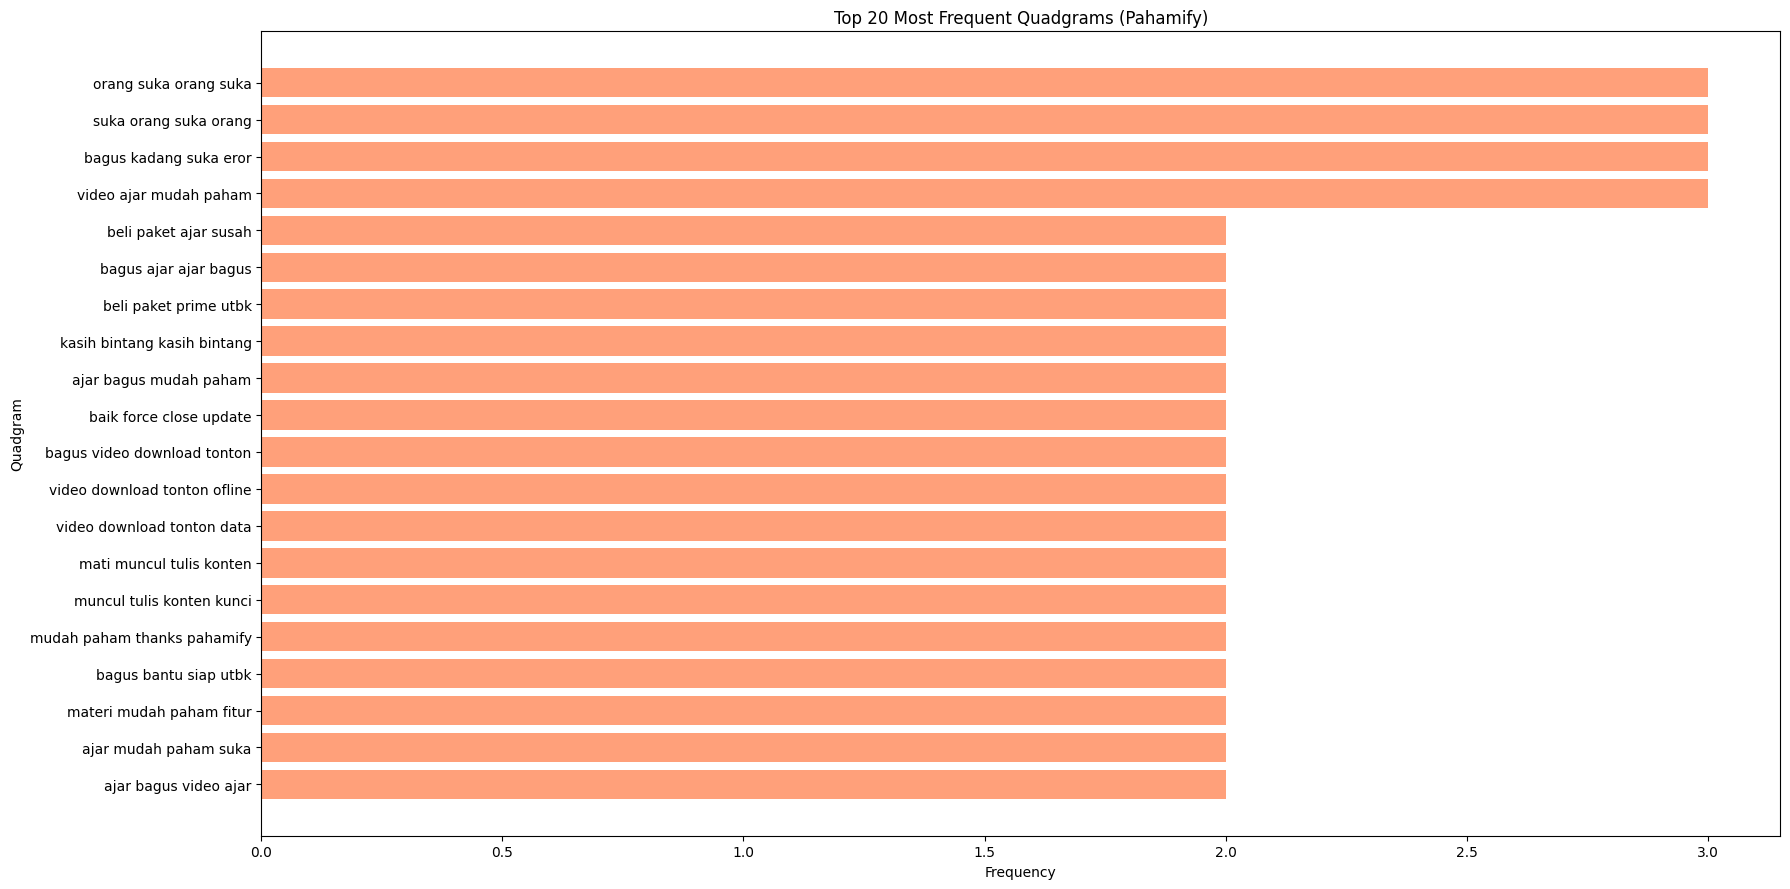

Top 20 quadgrams for Pahamify displayed successfully.

===== Visualizing N-grams for Quipper =====


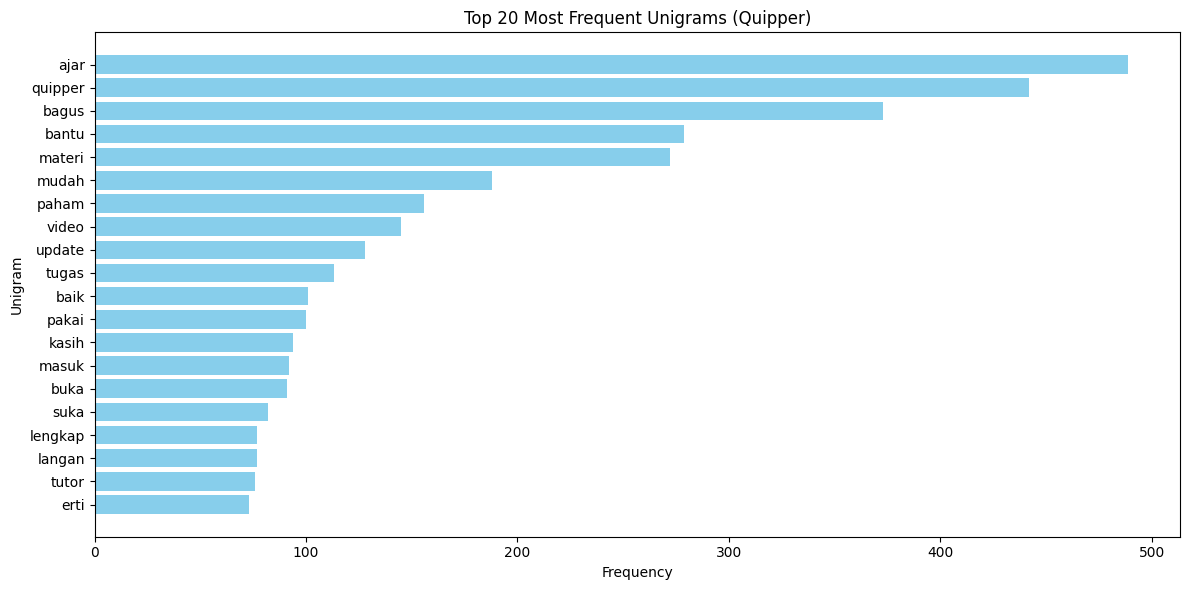

Top 20 unigrams for Quipper displayed successfully.


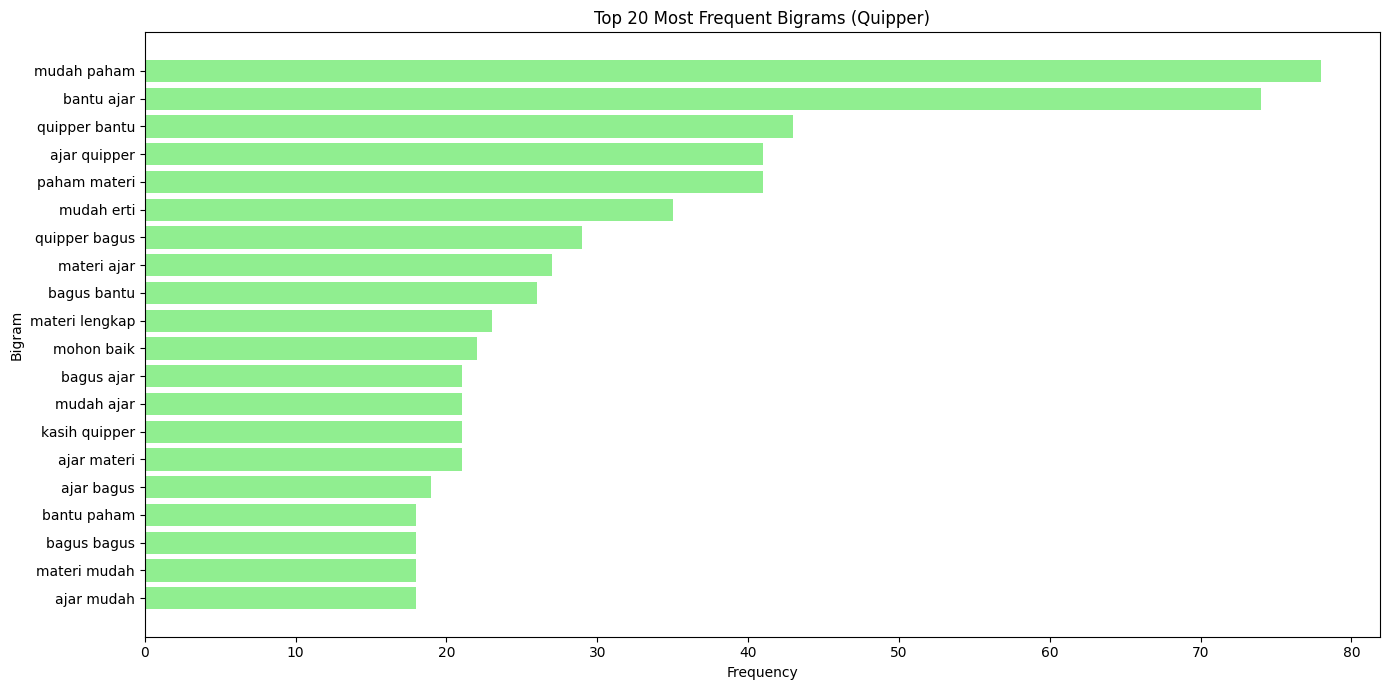

Top 20 bigrams for Quipper displayed successfully.


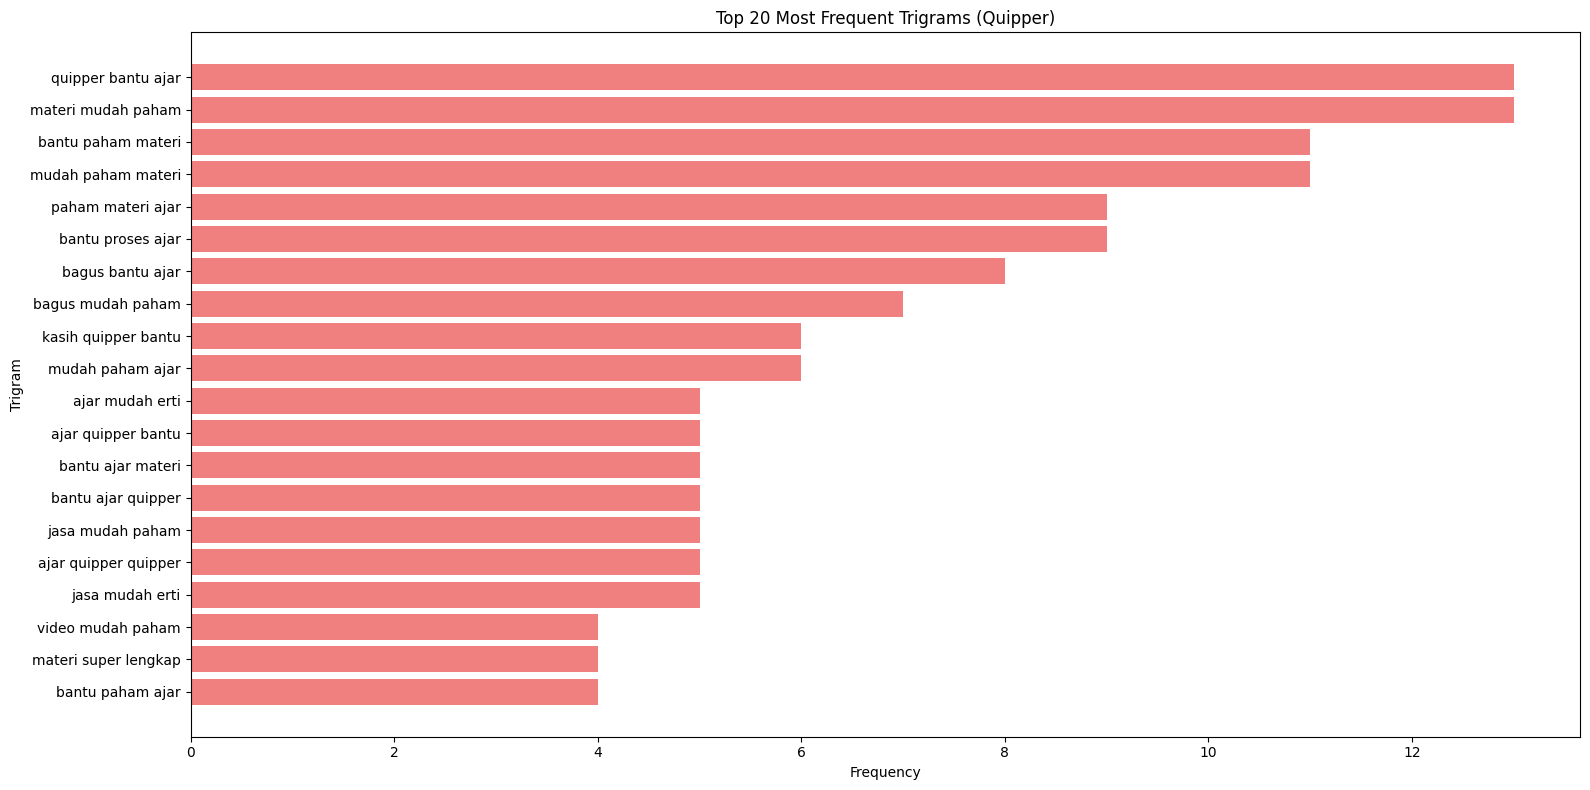

Top 20 trigrams for Quipper displayed successfully.


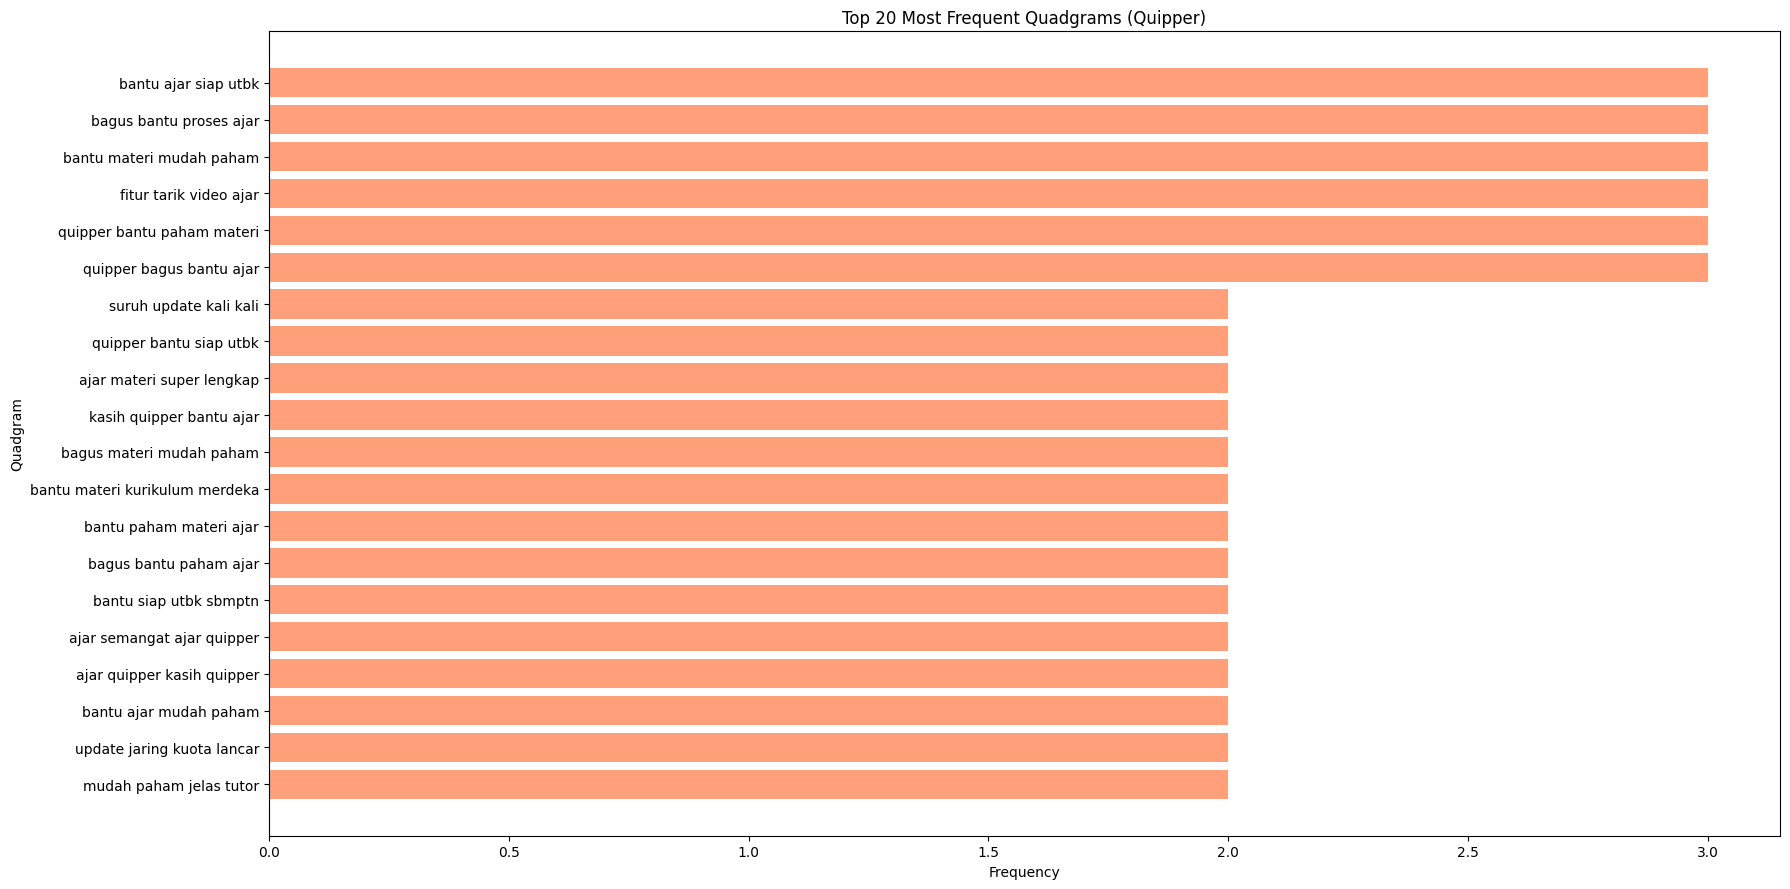

Top 20 quadgrams for Quipper displayed successfully.


In [ ]:
import matplotlib.pyplot as plt

for app_name, freqs in app_ngram_freqs.items():
    print(f"\n===== Visualizing N-grams for {app_name} =====")

    # 1. Unigrams for current app
    top_20_unigrams_app = freqs['unigrams'].most_common(20)
    if top_20_unigrams_app:
        words, counts = zip(*top_20_unigrams_app)
        words = words[::-1]
        counts = counts[::-1]
        plt.figure(figsize=(12, 6))
        plt.barh(words, counts, color='skyblue')
        plt.xlabel('Frequency')
        plt.ylabel('Unigram')
        plt.title(f'Top 20 Most Frequent Unigrams ({app_name})')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()
        print(f"Top 20 unigrams for {app_name} displayed successfully.")
    else:
        print(f"No unigrams to display for {app_name}.")

    # 2. Bigrams for current app
    top_20_bigrams_app = freqs['bigrams'].most_common(20)
    if top_20_bigrams_app:
        bigram_phrases = [' '.join(bigram) for bigram, count in top_20_bigrams_app]
        counts = [count for bigram, count in top_20_bigrams_app]
        bigram_phrases = bigram_phrases[::-1]
        counts = counts[::-1]
        plt.figure(figsize=(14, 7))
        plt.barh(bigram_phrases, counts, color='lightgreen')
        plt.xlabel('Frequency')
        plt.ylabel('Bigram')
        plt.title(f'Top 20 Most Frequent Bigrams ({app_name})')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()
        print(f"Top 20 bigrams for {app_name} displayed successfully.")
    else:
        print(f"No bigrams to display for {app_name}.")

    # 3. Trigrams for current app
    top_20_trigrams_app = freqs['trigrams'].most_common(20)
    if top_20_trigrams_app:
        trigram_phrases = [' '.join(trigram) for trigram, count in top_20_trigrams_app]
        counts = [count for trigram, count in top_20_trigrams_app]
        trigram_phrases = trigram_phrases[::-1]
        counts = counts[::-1]
        plt.figure(figsize=(16, 8))
        plt.barh(trigram_phrases, counts, color='lightcoral')
        plt.xlabel('Frequency')
        plt.ylabel('Trigram')
        plt.title(f'Top 20 Most Frequent Trigrams ({app_name})')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()
        print(f"Top 20 trigrams for {app_name} displayed successfully.")
    else:
        print(f"No trigrams to display for {app_name}.")

    # 4. Quadgrams for current app
    top_20_quadgrams_app = freqs['quadgrams'].most_common(20)
    if top_20_quadgrams_app:
        quadgram_phrases = [' '.join(quadgram) for quadgram, count in top_20_quadgrams_app]
        counts = [count for quadgram, count in top_20_quadgrams_app]
        quadgram_phrases = quadgram_phrases[::-1]
        counts = counts[::-1]
        plt.figure(figsize=(18, 9))
        plt.barh(quadgram_phrases, counts, color='lightsalmon')
        plt.xlabel('Frequency')
        plt.ylabel('Quadgram')
        plt.title(f'Top 20 Most Frequent Quadgrams ({app_name})')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()
        print(f"Top 20 quadgrams for {app_name} displayed successfully.")
    else:
        print(f"No quadgrams to display for {app_name}.")